In [18]:
import numpy as np
import pandas as pd

In [19]:
dataset=pd.read_csv('A2.tsv', delimiter = '\t', quoting = 3)
dataset.head()

Review
0                        Spend your money elsewhere.
1  Their regular toasted bread was equally satisf...
2  The Buffet at Bellagio was far from what I ant...
3                   And the drinks are WEAK, people!
4                         -My order was not correct.

In [20]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tnoya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
corpus=[]
for i in range(0,100):
    review=re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review=' '.join(review)
    corpus.append(review)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cvFile='bow sentiment model.pkl'
cv=pickle.load(open(cvFile,"rb"))

In [23]:
X_fresh=cv.transform(corpus).toarray()
X_fresh.shape

(100, 1578)

In [24]:
import joblib 
classifier=joblib.load('classifier sentiment model')

In [25]:
y_pred=classifier.predict(X_fresh)
print(y_pred)
print(len(y_pred))

[0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
100


In [32]:
dataset['predicted_labe']=y_pred.tolist()

dataset.head()

Review  predicted_label  \
0                        Spend your money elsewhere.                0   
1  Their regular toasted bread was equally satisf...                1   
2  The Buffet at Bellagio was far from what I ant...                1   
3                   And the drinks are WEAK, people!                0   
4                         -My order was not correct.                0   

   predicted_labe  
0               0  
1               1  
2               1  
3               0  
4               0

In [33]:
dataset.to_csv('predict sentiment.tsv',sep='\t',encoding='UTF-8',index=False)

In [34]:
import matplotlib.pyplot as plt


[0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
0     0
1     1
2     1
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: predicted_labe, Length: 100, dtype: int64


ValueError: x and y must have same first dimension, but have shapes (2,) and (100,)

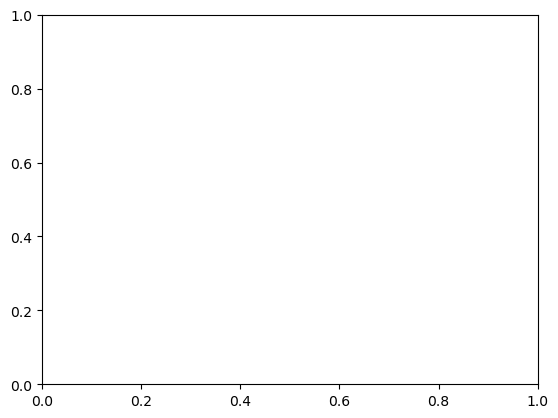

In [35]:
z=[0,1]
print(y_pred)
print(dataset['predicted_labe'])
plt.plot(z,y_pred)
plt.show()